In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [6]:
x_train.shape

(60000, 28, 28)

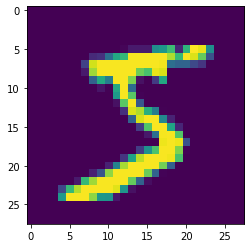

In [7]:
plt.imshow(x_train[0])

In [8]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0] , num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0] , num_pixels).astype('float32')

In [9]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [10]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_test.shape[1]
print(num_classes)

10


In [16]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels,activation='relu',input_shape=(num_pixels,)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [17]:
model=classification_model()

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 29s - loss: 0.2294 - accuracy: 0.9345 - val_loss: 0.1533 - val_accuracy: 0.9577
Epoch 2/50
 - 28s - loss: 0.1203 - accuracy: 0.9656 - val_loss: 0.1490 - val_accuracy: 0.9618
Epoch 3/50
 - 29s - loss: 0.0933 - accuracy: 0.9733 - val_loss: 0.1286 - val_accuracy: 0.9692
Epoch 4/50
 - 29s - loss: 0.0786 - accuracy: 0.9782 - val_loss: 0.1628 - val_accuracy: 0.9593
Epoch 5/50
 - 32s - loss: 0.0655 - accuracy: 0.9813 - val_loss: 0.1205 - val_accuracy: 0.9711
Epoch 6/50
 - 34s - loss: 0.0578 - accuracy: 0.9845 - val_loss: 0.1493 - val_accuracy: 0.9708
Epoch 7/50
 - 30s - loss: 0.0486 - accuracy: 0.9862 - val_loss: 0.1585 - val_accuracy: 0.9722
Epoch 8/50
 - 29s - loss: 0.0445 - accuracy: 0.9878 - val_loss: 0.1455 - val_accuracy: 0.9714
Epoch 9/50
 - 31s - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.1479 - val_accuracy: 0.9730
Epoch 10/50
 - 29s - loss: 0.0420 - accuracy: 0.9900 - val_loss: 0.1418 - val_accuracy: 0.9722
Epoch 11/

In [23]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Accuracy:{}% \n Error:{}'.format(score[1]*100,1-score[1]))

Accuracy:97.54999876022339% 
 Error:0.024500012397766113
